# Unit 3.4.1 Linear SVM

To introduce Support Vector Machines we'll start with the simplest example: linear support vector binary classifiers. This modeling technique will provide decent performance as well as a solid gateway into more advanced SVM techniques.

Let's look at some data that we might want to classify. Imagine you've got some data from a course about test scores, project scores, and whether the student passed or failed the course.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

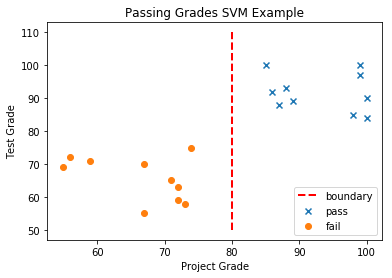

In [2]:
# Example data.
test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

# Reusable function to plot our data.
def setup_plot():
    plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
    plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

    # We'll eyeball a pass / fail line to split the points.
    plt.plot([80, 80], [50, 110], 'r--', lw=2)

    plt.xlabel('Project Grade')
    plt.ylabel('Test Grade')

setup_plot()
plt.legend(['boundary', 'pass', 'fail'], loc=4)
plt.title('Passing Grades SVM Example')
plt.show()
    

In the plot above we eyeballed a straight line decision **boundary** between the pass and fail data points. But is this the _best possible_ boundary line for making predictions? Here are some other options.

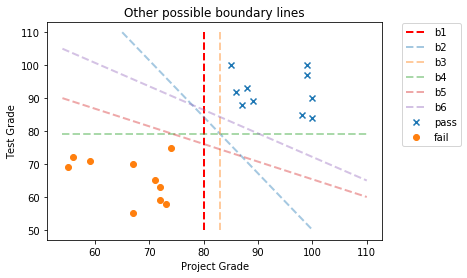

In [3]:
# Throw some other possible boundary lines into the mix.

# Rebuild the previous plot.
setup_plot()

# Add some new boundary lines.
plt.plot([65, 100], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([83, 83], [110, 50], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [79, 79], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [90, 60], '--', lw=2, alpha=0.4)
plt.plot([54, 110], [105, 65], '--', lw=2, alpha=0.4)

plt.legend(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'pass', 'fail'],
            bbox_to_anchor=(0.25, 0.02, 1, 1))
plt.title('Other possible boundary lines')
plt.show()

Are any of these new boundary lines better than our first attempt? Which color looks best to you? Why?

## Margin and Support Vectors

You probably have an intuition that a boundary line passing close to data points is bad because it'll be susceptable to noise and be worse at predicting new data points than a boundary line farther away. In SVM we formalize that intuition by defining the **margin** as the distance between the nearest point of each class and the boundary.

Finding the margin for our initial red boundary line is easy. The nearest point for each class is at (85,100) and (74,75). These nearest points are the **support vectors** that our model is named after. The distance from our support vectors to the red boundary line is just the horizontal distance (because our boundary happens to be vertical). The margin is 5 from the pass support vector and 6 from the fail support vector.

Is that the best we can do? No. Several of the other boundary lines are worse, like the orange boundary line `b3`, but looking at the light blue boundary line `b2` above you can probably see without having to do the math that the margin is larger so it's a _better_ boundary than our initial red boundary. 

**The goal of SVM is find the _best_ boundary, or the boundary that optimizes the margin.**


## Finding the optimal boundary

Let's fire it up, using SKLearn to find the actual optimal boundary line. We're doing a linear SVM example, so we'll force the boundary to be linear. To do this we'll use SVC with a linear kernel. We'll get into what that is and other options later. The "C" in `SVC` here stands for "classifier".

In [4]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = test_data[['test', 'project']]
Y = test_data['pass']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**What does this mean?^^^ **

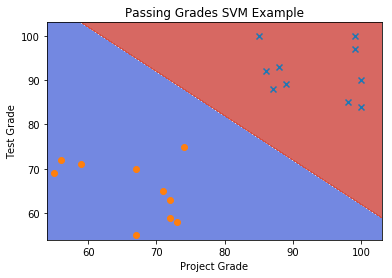

In [5]:
# Visualize our model
# Determining graph margins
y_min, y_max = X.test.min() - 1, X.test.max() + 3
x_min, x_max = X.project.min() - 1, X.project.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

# Calculating optimal boundary
# np.c_ stacks 1D arrays into 2D arrays. ravel Return the flattened underlying data as an ndarray
Z = (svm.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(test_data.project[0:10], test_data.test[0:10], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades SVM Example')
plt.show()

That looks pretty much as we'd expect. We can see a nice clear division between the two classes with a maximum distance between the support vectors and the decision boundary. High five ✋

## Things Get Messy

Now this is a nice example, but there are several things about it that are far simpler than anything you're likely to run into in the wild.

This dataset is in two dimensions, but SVM works in as many dimensions as you'd like (given the limitations of your computing resources). The boundary between two groups is therefore not always a line. A line is simply the way to represent this boundary in two dimensions. In general terms, the boundary is always a "hyperplane".

A **hyperplane** in n-dimensional space is _an n-minus-one-dimensional space_. So for a 2-dimensional plane like this one, a hyperplane is a 1-dimesional line. In 3-dimensional space the hyperplane is a 2-dimensional plane. In 4-dimensional spacetime a hyperplane is a 3-dimensional space. It gets tricky to visualize from here, but the concept continues in any number of dimensions.

Also of note is that this dataset has a boundary that groups each observation exclusively on one side of the line. This is called a _hard margin_. It won't always be possible to make a boundary with a hard margin, however. When it's not, the problem is called _soft margin_ (these two terms apply to all classifiers, by the way).

To deal with this kind of problem, SVM imposes a _cost function._ The cost function gives SVM two things to balance: the size of the margin (which it wants to maximize) and the cumulative distance of points on the wrong side of the margin from the boundary (which it wants to minimize).

How SVM balances these factors is complex and understanding the vector math behind it is not essential. What _is_ important to know is that you can control the priorities of this tradeoff by controlling that weight. How you'd want to tune it depends on your tolerance for inaccurate results as compared to large margins.

# Unit 3.4.2 The Kernel Trick

So far we’ve talked about SVM with linear boundaries. We put together an example in the previous assignment. Our boundary was a line with a given slope and intercept, a pretty simple thing to visualize. However, a straight line doesn't always nicely classify our data.

In this assignment we’ll show you that we can create _non-linear decision boundaries by transforming our data into a higher dimension_, finding a good hyperplane boundary in the higher dimension, and transforming the result back to our starting data. We'll also quickly cover the "kernel trick" that SVM uses to _actually_ find our boundary hyperplane in an efficient way that would otherwise be computationally prohibitive using that brute force solution.

Note: this assignment includes interactive 3d plots. Take a moment now to restart the kernel and run all cells.

## Thinking outside the plane

Let's say you have some data that looks like this:

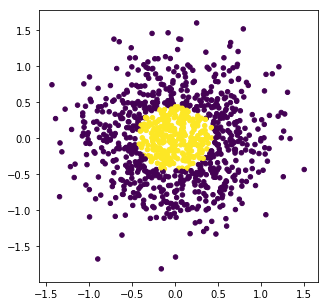

In [7]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .2

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20)

Clearly no straight line boundary is going to do a good job here. What you _really_ want is a circular boundary. Is there any way to do that with a hyperplane? Yes. You just need a little perspective. Let's transform our data from two dimensions into three dimensions by adding a new feature. Specifically, let's add the new feature $x^2 + y^2$.

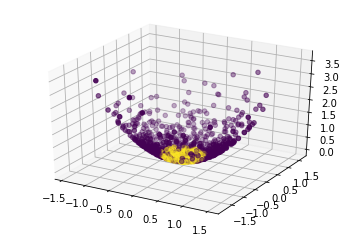

In [12]:
# We're doing some 3D plotting now. 
# Tinker with it if you like but python is generally not great at this kind of thing...

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

You can move these 3d plots around to get a good perspective on what's going on.

**HOW?**

A hyperplane of this new three-dimensional space is just a regular old two-dimensional plane. Let's slip one in right between our classes.

AttributeError: 'float' object has no attribute 'ndim'

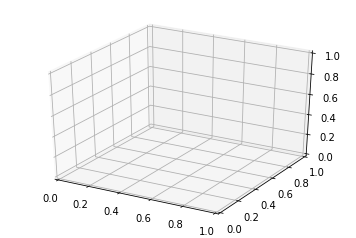

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
ax.plot_surface(xx, yy, .2, color='k', alpha=.5)
ax.hold(True)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

Transforming back to two dimensions, we end up with exactly the nonlinear boundary we need.

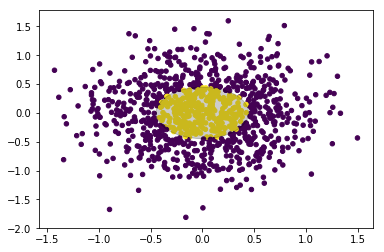

In [14]:
circle1 = plt.Circle((0, 0), np.sqrt(.2), color='k', alpha=.2)

fig, ax = plt.subplots()

ax.scatter(data['x'], data['y'], c=data['d'], s= 20)
ax.add_artist(circle1)

This can take a bit to wrap your mind around. Here's an excellent 3d animated example.

[![SVM higher dimension visualization](assets/SVM_visualization.png)](http://www.youtube.com/watch?v=3liCbRZPrZA "SVM with polynomial kernel visualization")

Bam, problem solved. We were able to generate a nice boundary by transforming into higher dimensional space, finding the optimal hyperplane, and then transforming back.

## Kernels and the "kernel trick"

Here's the bad news. In practice you won't have the computational resources to do this. Knowing how many dimensions you’ll need is not a simple calculation, and for real data you'll probably want to run SVM with a _very_ large number of features leading to a _very high_ dimensional space. Trying to _actually_ transform your data like this would require more computational and memory resources than you practically have at your disposal, making this transformation impractical when working with real data.

The good news is that we can find the optimal hyperplane of a higher dimensional space _without actually transforming our data into that space_. Really? Really. The process SVM uses for this is called **the kernel trick**. The kernel trick turns our search for a higher dimensional hyperplane boundary from a practical impossibility into a computationally reasonable task. The vector math involved in the kernel trick is too much for us to completely explain here. We'll dive into it just enough for you to tune these models, but we’ll link out to several external resources for those who wish to go deeper. Don’t feel compelled to read all of them to complete comprehension.

### What _is_ a kernel?

You’ve heard the term "kernel" previously to refer to the central hub of your computer, linking hardware and OS. You might be used to stopping and re-running your Python kernel in Jupyter notebooks. What we’re talking about here is _totally different_.

Here we think of **kernel functions** (or just "kernels") as a way of mapping data to a space using weights. You can see kernels all over data science once you start looking for them.

The most common example is probably [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother). With kernel smoothing you take a series of observations and instead of plotting each one individually you generate a smoothed curve. This smoothing is a byproduct of each observation becoming a weighted distribution in and of itself and then aggregating those cumulative distributions, resulting in something smooth rather than jumpy.

Kernels are a huge topic, and as a term it’s used to refer to many different but related concepts. The [wiki disambiguation page for kernels](https://en.wikipedia.org/wiki/Kernel) has links to 22 different pages on kernels that are in some way related to mathematics or computing. It’s definitely a lot, and a field worthy of its own course (or more honestly several).


### Kernels in SVM

For our purposes with SVM, a kernel is a function that computes how "similar" two vectors are by computing their dot product. Even more specifically, in SVM a **kernel** is a _function that_ implicitly _computes the dot product between two vectors in a higher-dimensional space without_ actually _transforming the vectors into that space_.

This property is handy because _the dot product is all we need_ to find our optimal hyperplane in a higher dimensional space. Trust us for now on that. The complexity of these kernel functions depend only on the number of dimensions of the input, not on the number of dimensions in the higher-dimensional feature space, so you can work with an infinite-dimensional feature space just as easily as with the space of your input data. This is called the **kernel trick**, and lets us work with feature spaces that would otherwise be practically impossible to manage.

## Additional resources

You don't need to know more than this right now. If, however, you want a full explanation of the math behind the kernal trick read this [post by Eric Kim](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html), then this [paper by Martin Hoffman](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf). This [hour lecture from Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o) is a good short-breathed derivation of everything you've covered in SVM so far. All those links are optional. If you don't have a good intuition of why dot products are important, check out this [video by Sal Khan](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length) from Khan Academy's linear algebra sequence.

## Kernel Estimation in Practice

Now, there are multiple kernels you can use in SVM. The default in SKLearn is called the __radial basis function__, which uses a Gaussian decay according to the distance from the original point. This is the most common choice, and for our purposes you should stick to it unless you have a strong reason not to.

You can also use linear kernels, polynomial kernels, or sigmoid kernels - all of which are preprogrammed into SKLearn’s `SVC` function.

When do you have a strong reason to choose another kernel? You may know enough about your data and [the geometry it follows](https://stats.stackexchange.com/a/18032) that you can choose a more appropriate kernel. The other, more common, method for deciding which kernel to use is to rely upon cross-validation. As long as you are within the training set, using cross validation is a reasonable way to choose a kernel methodology, but if you're tuning other hyperparameters as well this could become quite a long process. Be aware that some kernels will lead to overfitting in specific situations, so you want to be wary.

# Unit 3.4.3 Extensions

So far we've talked about the simplest possible version of Support Vector Machines. There are many different scenarios that make slight alterations to the model. We'll cover them from a conceptual basis and won't go through the mathematical proofs behind these alterations or fully chart out their ramifications for things like the loss function or how the algorithm iteratively finds optimal boundaries.

## Multiple Classes
So far we've only talked about using SVM as a binary classifier. If SVM only worked as a binary classifier it probably wouldn't have seen the wide adoption and use that it has. How do we extend it to cover multiple classes?

The simplest way is to do a hold-one-out form of binary classifier many many times (or for as many values as your outcome can take). Then for each category you create a binary classifier between having that category or having any other outcome. To aggregate these and create a multi-class classifier, each one has an output function to define its confidence in classification, which is related to its distance from the boundary and the weights for the accuracy of the classifier. The highest output value dominates thereby deciding the class.

Another way to do it is pairwise, where every category is compared to the others in pairs. Here the class is decided by the maximum number of wins given an observation's characteristics. So an observation is categorized under every possible pair of outcomes, and then the outcome is assigned to the one that was most common.

## SVM as Regressor
Support Vector Regression (SVR) operates much like an inversion of the classification problems we've been dealing with thus far. In classification we had a computational advantage because we were only interested in the points closest to the boundary. In regression, we instead are only interested in values far away from the prediction.

There are two major values we tune in SVR, C and epsilon. C is called the box constraint and sets the penalty for being outside of our margin. Epsilon sets the size of our margin. So again much like the classification problem we gather our data and find its distance from a specified point (previously the boundary, now the prediction) and optimize the cost from observations being outside the margin. This ends up being a huge advantage of SVM for regression: you can set the sensitivity when building the model, not just after the fact.

## Clustering
SVM can also be used as an unsupervised clustering algorithm. We haven't yet talked about unsupervised learning (other than a brief foray into PCA) or what a clustering algorithm does, and we won't cover all of that here. Rather, keep this technique of defining boundaries and margins in mind when we start the next unit and discuss classifiers. It will be hugely relevant.

## So, why SVM?
SVM's primary advantage is its flexibility. It can have great visual explanatory power (linear SVC), tremendous accuracy (kernel smoothing), clustering (SVClustering), or the ability to control the specificity of training (SVR). Some of these options come at the cost of computational efficacy and explanatory power, particularly when in high dimensions when kernels get involved, but overall it remains a versatile modeling class that is capable of doing many different things very well.



# Unit 3.4.4 Guided example + challenge

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

**What we want to see is if we can use the ingredient and keyword list to predict the rating.** For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [3]:
raw_data = pd.read_csv('datafiles/epi_r.csv')

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

In [7]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wow. 680 columns.

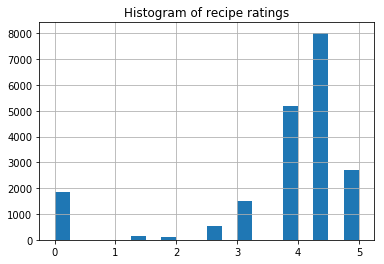

In [20]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of recipe ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [21]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [22]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

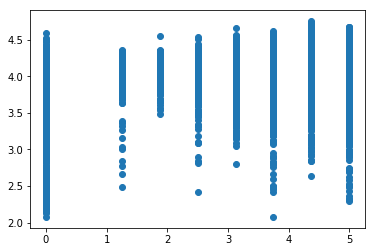

In [23]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [ ]:
#svr.score(X, Y)

Takes too long to run. Should get 0.038565706512988962

In [ ]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(svr, X, Y, cv=5)

Takes too long to run. Should get

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])


Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [9]:
raw_data['good_rating'] = np.where(raw_data.rating<4, 0, 1)
Y_class = raw_data['good_rating']

In [12]:
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [13]:
from sklearn.svm import SVC

svc = SVC(C=1e-9, kernel='rbf')
svc.fit(X, Y_class)

SVC(C=1e-09, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
svc.score(X, Y_class)

0.53550768003191707

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y_class, cv=5)

array([ 0.5355273 ,  0.5355273 ,  0.5355273 ,  0.53541147,  0.53554502])

Alright! A little better than randomly guessing!

# What is a good method to picking 30 features for the model?